# The Greatest Offensive Season in NBA History 

<span style="font-size:15px;">Description: We want to determine which NBA player had the greatest offensive season of all time. This will be a comprehensive breakdown on player analytics, incorporating aspects of quantitative and qualitative analysis, as well as personal judgement. The core of the analysis will be demonstrated through visualization techniques learned from lectures and other sources.</span>

<span style="font-size:15px;">Contributors: Brandon Chan (169024924), Brayden</span>


# Imports 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklm
from matplotlib.lines import Line2D

# Cleaning the Dataset  

In [47]:
# Import the dataset and skip the first row 
URL="https://raw.githubusercontent.com/BrandonYChan/Data-Visualization-Project/main/MVP.csv"
MVP= pd.read_csv(URL, skiprows=1, skipfooter=1, engine='python')
#source: basketballreference.com (Added to our GitHub) 

# Remove unnecessary columns
MVP.drop(columns=['-9999', 'Voting', 'Lg'], inplace=True)

# Regex to split the season into start and end date 
MVP['Keys']=MVP['Player'].str.split(' ', n=1, expand=True).iloc[:,1]
MVP['Keys']=MVP['Keys'] + ' ' + MVP['Season'].apply(lambda x:x[-2:]) + "'"
MVP.set_index(MVP['Keys'], inplace=True)

MVP.head(5)

,Season,Player,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Keys
Keys,,,,,,,,,,,,,,,,,
Embiid 23',2022-23,Joel Embiid,28,PHI,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259,Embiid 23'
Jokić 22',2021-22,Nikola Jokić,26,DEN,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296,Jokić 22'
Jokić 21',2020-21,Nikola Jokić,25,DEN,72,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301,Jokić 21'
Antetokounmpo 20',2019-20,Giannis Antetokounmpo,25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279,Antetokounmpo 20'
Antetokounmpo 19',2018-19,Giannis Antetokounmpo,24,MIL,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292,Antetokounmpo 19'


There wasn't much work that I needed to put into cleaning the data. The most important change I made was to create a new key value that uniquely represents the player and the season, since some players won multiple MVPs.

# Setting the Criteria

Several categories will be considered before determining which player had the greatest season of all time. Key players with positive outlier statistics wil be added to the best seasons list, and the final selection will be made from players in the list. 

In [38]:
best_seasons=[]

# Best Scorers

Mean points: 26.188235294117643
Standard deviation for points: 5.1490013141260675
Number of top scorers: 11


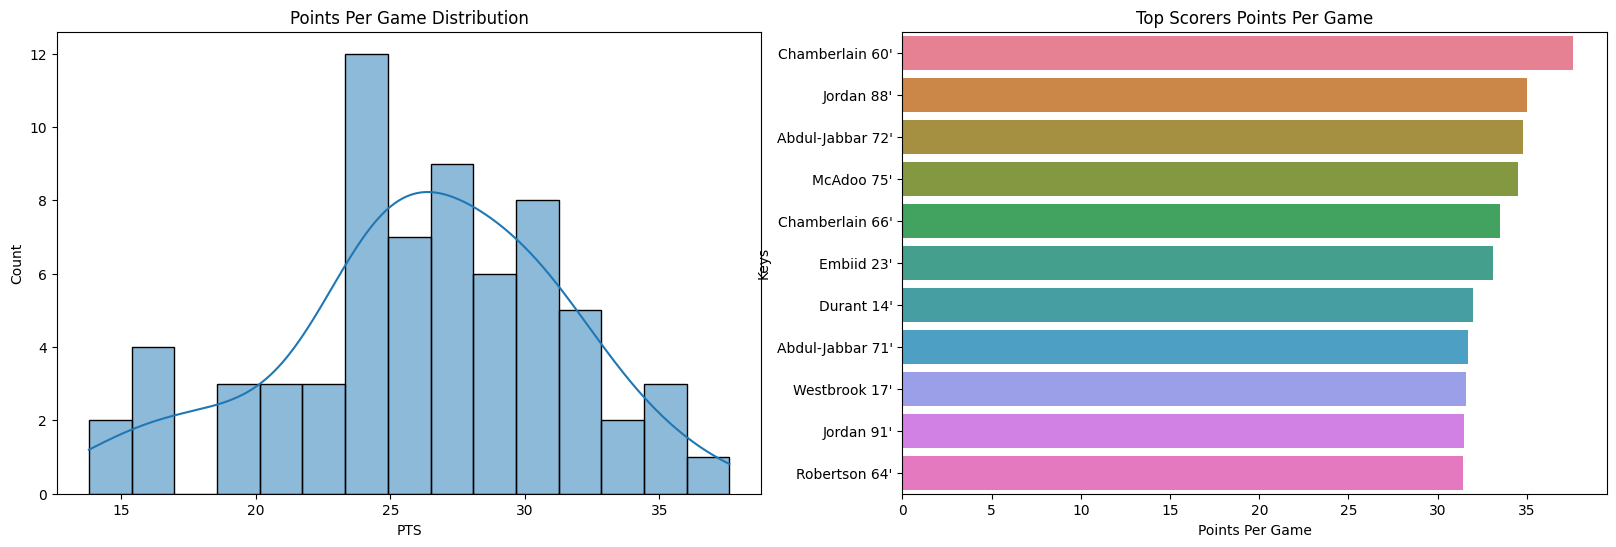

In [39]:
# Create axes for plots
fig, ax=plt.subplots(ncols=2,figsize=(20, 6))

# Descriptive statistics for scoring
mean_pts = np.mean(MVP['PTS'])
sd_pts = np.std(MVP['PTS'])
print(f'Mean points: {mean_pts}\nStandard deviation for points: {sd_pts}')

# Scoring distribution
sns.histplot(MVP['PTS'], kde=True, bins=15, ax=ax[0])
ax[0].set_title("Points Per Game Distribution")

# Filtering data to only include elite scorers (>1 sd from the mean) 
top_scorers = MVP[MVP['PTS'] > (mean_pts + sd_pts)].sort_values(by='PTS',ascending=False)
print(f'Number of top scorers: {len(top_scorers)}')

# Plotting the top scorers 
# ax[1].barh(top_scorers['Keys'], top_scorers['PTS'])
sns.barplot(data=top_scorers, x='PTS', y='Keys', ax=ax[1], hue='Keys')
ax[1].set_xlabel("Points Per Game")
ax[1].set_title("Top Scorers Points Per Game")



plt.show()

The clear leader in this category is Wilt Chamberlain's 1959-60 season. He eclipsed the rest by a reasonably significant margin, although arguments could be made that he played in a weaker era with a higher scoring pace. Unfortunately, I don't have the data to compare to the average player's points per game in that season, so making I will not make that distinction. Interestingly, Wilt averaged 50 points per game the next season, but he did not win MVP so that season cannot be included.

# Efficiency 

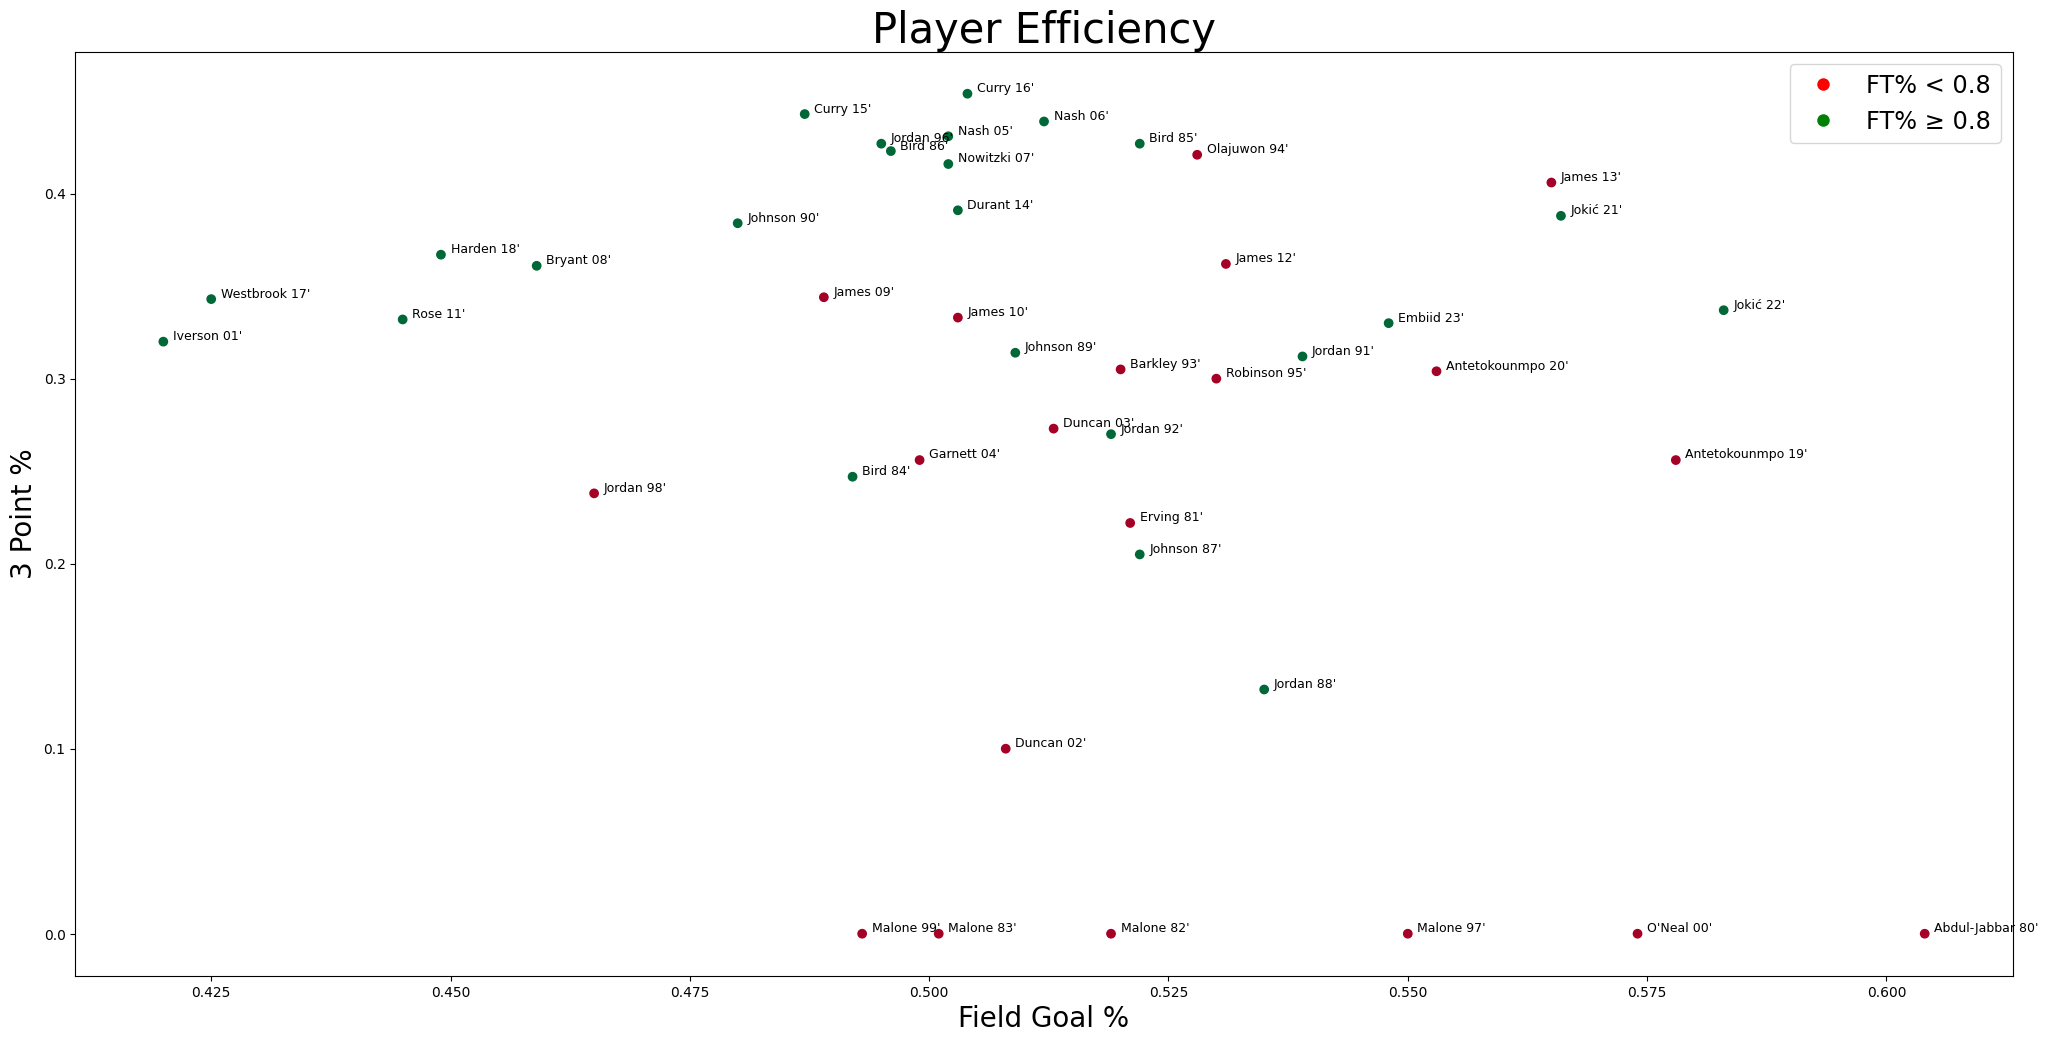

In [40]:
# Function to color points based on freethrow % 
def color_ftpct(percentage):
    if percentage>0.8:
        return 1
    else: 
        return 0
colors=[color_ftpct(percentage) for percentage in MVP['FT%']]

# Create plot
fig, ax=plt.subplots(ncols=1,figsize=(25,12))

# Colours scatterplot by FT%
plt.scatter(MVP['FG%'], MVP['3P%'], c=colors, cmap='RdYlGn')

# Adds player/season labels 
for i, player in enumerate(MVP.index):
    plt.annotate(player, (MVP.loc[player, 'FG%']+0.001, MVP.loc[player, '3P%']+0.001), fontsize=9)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='FT% < 0.8', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='FT% ≥ 0.8', markerfacecolor='green', markersize=10),
]

# Adds labels to plot
plt.xlabel("Field Goal %", fontsize=20)
plt.ylabel("3 Point %", fontsize=20)
plt.title("Player Efficiency", fontsize=30)
plt.legend(handles=legend_elements, fontsize='xx-large')
plt.show()

This is admittedly a bit of a confusing plot, but I wanted to encompase all 3 areas of efficiency together. Although there are various extremes in efficiency such as Curry's 2015-16 season and Kareem's 1979-80 season, Jokic's 2021-22 season appears to me as the most all around efficient, considering field goal, 3 point, and free throw efficencies.

# Passing and Rebounding 

Highest Assist Season: Johnson 89': 12.8 assists per game
Highest Rebound Season: Chamberlain 60': 27.0 rebounds per game


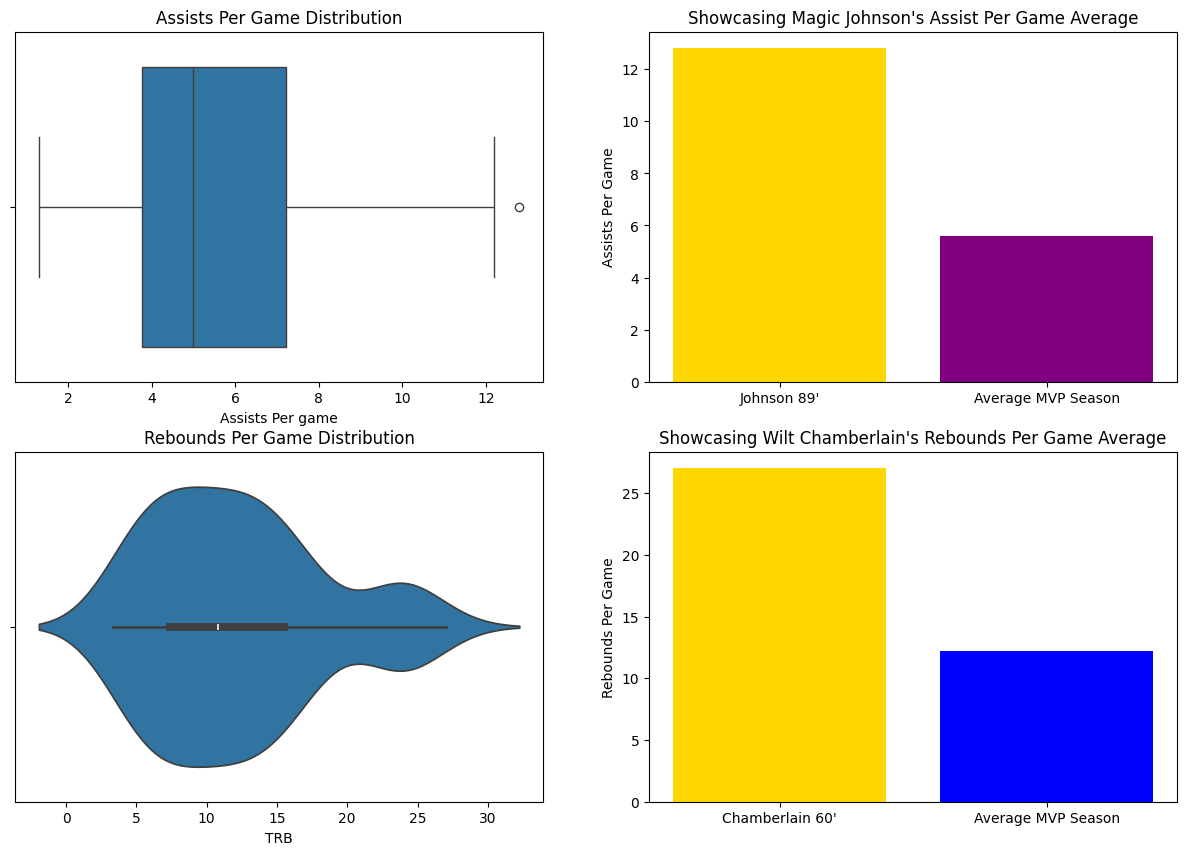

In [41]:
# Create plot area 
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

# Upon visualizing the boxplot of assists, there is one clear outlier of a season
sns.boxplot(MVP, x='AST', ax=ax[0][0])
ax[0][0].set_title("Assists Per Game Distribution")
ax[0][0].set_xlabel("Assists Per game")

# Finding and outputting the outlier season 
max_ast = np.argmax(MVP['AST'])
top_ast_ssn=MVP.iloc[max_ast]
print(f'Highest Assist Season: {top_ast_ssn.Keys}: {top_ast_ssn.AST} assists per game')

# Comparing Magic Johnson's assists per game to the player's average assists per game 
colors = ['gold', 'purple']
mean_ast_ssn = np.mean(MVP.AST)
ax[0][1].bar([top_ast_ssn.Keys, 'Average MVP Season'],[top_ast_ssn.AST,mean_ast_ssn], color=colors)
ax[0][1].set_ylabel("Assists Per Game")
ax[0][1].set_title("Showcasing Magic Johnson's Assist Per Game Average")

# Repeating the same process for rebounds per game 

sns.violinplot(data=MVP, x='TRB', ax=ax[1][0])
ax[1][0].set_title("Rebounds Per Game Distribution")

max_trb = np.argmax(MVP['TRB'])
top_trb_ssn = MVP.iloc[max_trb] 
print(f'Highest Rebound Season: {top_trb_ssn.Keys}: {top_trb_ssn.TRB} rebounds per game')
ax[1][1].bar([top_trb_ssn.Keys, 'Average MVP Season'],[top_trb_ssn['TRB'], np.mean(MVP['TRB'])], color=['gold', 'blue'])
ax[1][1].set_title("Showcasing Wilt Chamberlain's Rebounds Per Game Average")
ax[1][1].set_ylabel("Rebounds Per Game")

plt.show()

Wilt and Magic both had outstanding seasons relative to their peers respectively in terms of rebounds and assists. Wilt's 1959-60 season has already been added to the best seasons list, so this only further contributes to the case of it being the greatest season of all time. As for Magic, his assists per game average is high enough to be an outlier, even compared to other MVPs.

# Selecting the Best Season

In [42]:
best_seasons.append(top_scorers.iloc[0])
best_seasons.append(MVP.loc["Jokić 22'"])
best_seasons.append(top_ast_ssn)
best_season_df=pd.DataFrame(best_seasons)

wilt = best_season_df.iloc[0]
jokic = best_season_df.iloc[1]
magic = best_season_df.iloc[2]

best_season_df[['Season', 'Player', 'PTS', 'TRB', 'AST', 'FG%']]

,Season,Player,PTS,TRB,AST,FG%
Chamberlain 60',1959-60,Wilt Chamberlain,37.6,27.0,2.3,0.461
Jokić 22',2021-22,Nikola Jokić,27.1,13.8,7.9,0.583
Johnson 89',1988-89,Magic Johnson,22.5,7.9,12.8,0.509


PTS correlation with win shares: 0.5327032654168316
TRB correlation with win shares: 0.11886555077461988
AST correlation with win shares: 0.046811779751236925
FG% correlation with win shares: 0.47502460171122973


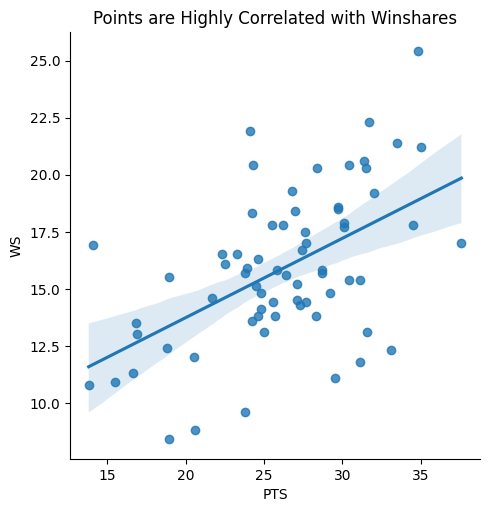

In [43]:
sns.lmplot(data=MVP, x='PTS', y='WS')
plt.title("Points are Highly Correlated with Winshares")

stats = ['PTS', 'TRB', 'AST', 'FG%']

for stat in stats:
    print(stat + " correlation with win shares: ", end="")
    print(np.corrcoef(MVP[stat], MVP['WS'])[0][1])

In [44]:
# I created a new proprietary stat based on stat correlation with win shares 
def aggregate_offensive_impact(PTS, TRB, AST, FGP):
    return PTS * (0.53) * (FGP) * (0.47) + TRB * (0.11) + AST * 0.04 

wilt_AOI = aggregate_offensive_impact(wilt.PTS, wilt.TRB, wilt.AST, wilt['FG%'])

jokic_AOI = aggregate_offensive_impact(jokic.PTS, jokic.TRB, jokic.AST, jokic['FG%'])

magic_AOI = aggregate_offensive_impact(magic.PTS, magic.TRB, magic.AST, magic['FG%'])

print(f"Wilt Chamberlain's aggregate offensive impact: {wilt_AOI}")
print(f"Nikola Jokic's aggregate offensive impact: {jokic_AOI}")
print(f"Magic Johnson's aggregate offensive impact: {magic_AOI}")


Wilt Chamberlain's aggregate offensive impact: 7.37979976
Nikola Jokic's aggregate offensive impact: 5.76960563
Magic Johnson's aggregate offensive impact: 4.23381775


Based on my newly created stat, Wilt Chamberlain's 1959-60 season was the greatest offensive season in NBA history. Since scoring is the primary indicator of offensive impact using this stat, it is unsurprising that Wilt wins this one. Nevetheless, Wilt's domninant scoring and rebounding is enough to take the title as having the greatest offensive season in NBA history. 

# Recognizing all MVPs

Not just any player is able to become an MVP. After all, only one person in the world will be the NBA's MVP in a single season. So in order to commemorate these players, their name will be displayed with the size of their name indicating the number of MVP awards they won.

In [50]:
# Imports for word cloud visualization
# !pip install wordcloud
from wordcloud import WordCloud
from nltk.probability import FreqDist

# Creates figure 
fig, ax = plt.subplots(figsize=(10, 10))

# Creates frequency distribution of names 
name_freq = FreqDist(MVP['Player'])

# Creates and generates wordcloud
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(name_freq)

# Shows word cloud 
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

# Conclusion 

Many of the greatest players in NBA history were assessed in this analysis, but only a select few were able to surpass their peers significantly in a category. These few include Magic Johnson, Nikola Jokic, and Wilt Chamberlain. In the end, it was determined to be Wilt who had the best offensive season according to the metrics used in the analysis. I would like to present some potential issues with the analysis, though. The statistics used in the analysis are more focused on the stat leaders in a single category, rather than well-rounded numbers that players such as Michael Jordan and Oscar Robertson had in their careers. However, the results of the analysis still speak volumes to Wilt Chamberlain's impact on the game and his dominance during his era. 